Stephanie Prussick, Avery Frankenberg, Lizzy Riffle

Political and Social Connections in 140 Characters or Less

First, we will use our credentials to access the Twitter API so we can scrape tweets from Trump and members of congress.

In [1]:
import twitter
import tweepy
twitter_api = twitter.Api(consumer_key="COhAhe7bQKAZmOTKojImOMi83",
                  consumer_secret="9SenQIo1dHnYIsQC7gypbqKmZCsbACCftwPiDTF90pL00xLHrQ",
                  access_token_key="508321881-wXRvIfjFUTypjgdFO8Cxfd0AUBSAasiIocggSGAV",
                  access_token_secret="fEKI3OxA2bWQUIfG4eUZwUxoaniG6chqPpif1O8DcaxTj",
                  tweet_mode='extended')
CONSUMER_KEY = "COhAhe7bQKAZmOTKojImOMi83"
CONSUMER_SECRET = "9SenQIo1dHnYIsQC7gypbqKmZCsbACCftwPiDTF90pL00xLHrQ"
ACCESS_TOKEN = "508321881-wXRvIfjFUTypjgdFO8Cxfd0AUBSAasiIocggSGAV"
ACCESS_SECRET = "fEKI3OxA2bWQUIfG4eUZwUxoaniG6chqPpif1O8DcaxTj"
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)
twitter_api.VerifyCredentials()

User(ID=508321881, ScreenName=stephieprussie)

In [ ]:
# import the twitter API 
import twitter
# import tweepy package 
import tweepy

# you must get your own keys to use the twitter API
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = ""
ACCESS_SECRET = ""

# access twitter API
twitter_api = twitter.Api(CONSUMER_KEY,
                  CONSUMER_SECRET,
                  ACCESS_TOKEN,
                  ACCESS_SECRET,
                  tweet_mode='extended')
# access tweepy
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)
twitter_api.VerifyCredentials()

Next, we will get Trump's tweets and store them in JSON format in addition to calculating each tweet's sentiment score and adding that into the file as well.

In [ ]:
# import Afinn for sentiment analysis
from afinn import Afinn
afinn = Afinn()
# import json so we can save our twitter data into JSON format
import json

# get Trump's last 100 tweets
trump_tweets = twitter_api.GetUserTimeline(screen_name="realDonaldTrump",count=100)

# store trumps tweets as JSON
result = []
for tweet in trump_tweets:
        result.append({
            "nodes" {
                "text": tweet.full_text, 
                "author_name": "realDonaldTrump",
                "mentions": str(tweet.user_mentions),
                "hashtags": str(tweet.hashtags),
                "retweets": tweet.retweet_count,
                "favorites": tweet.favorite_count,
                "sentiment": afinn.score(tweet.full_text)
            }
        })
with open('trump_tweets.json', 'w+') as f:
    json.dump(result, f)

Here we will use "Lists" on twitter to get the official screen names of members of congress, for example: https://twitter.com/HouseDemocrats/lists/house-democrats/members?lang=en

In [2]:
# get screen names of republicans in the house of representatives
houseR_screen_names = []
for user in tweepy.Cursor(api.list_members, slug="house-republicans", owner_screen_name="HouseGOP", include_entities=True).items():
    houseR_screen_names.append(user.screen_name)
    
# get screen names of democrats in the house of representatives
houseD_screen_names = []
for user in tweepy.Cursor(api.list_members, slug="house-democrats", owner_screen_name="HouseDemocrats",include_entities=True).items():
    houseD_screen_names.append(user.screen_name)

# get screen names of republicans in the senate
senateR_screen_names = [] 
for user in tweepy.Cursor(api.list_members, slug="senaterepublicans", owner_screen_name="SenateGOP",include_entities=True).items():
    senateR_screen_names.append(user.screen_name)

# get screen names of democrats in the senate
senateD_screen_names = [] 
for user in tweepy.Cursor(api.list_members, slug="senatedemocrats", owner_screen_name="SenateDems",include_entities=True).items():
    senateD_screen_names.append(user.screen_name)

Now we will get the last 100 tweets of all the congressmen we have the screen names for.

In [ ]:
# get last 100 tweets of all house republicans and store in dict
houseR_tweetMap = {}
for name in houseR_screen_names:
    last_tweets = twitter_api.GetUserTimeline(screen_name=name,count = 100)
    houseR_tweetMap[name] = last_tweets

# get last 100 tweets of all house democrats and store in dict
houseD_tweetMap = {}
for name in houseD_screen_names:
    last_tweets = twitter_api.GetUserTimeline(screen_name=name,count=100)
    houseD_tweetMap[name] = last_tweets
    
# get last 100 tweets of all house republicans and store in dict
senateR_tweetMap = {}
for name in senateR_screen_names:
    last_tweets = twitter_api.GetUserTimeline(screen_name=name,count = 100)
    senateR_tweetMap[name] = last_tweets

# get last 100 tweets of all house democrats and store in dict
senateD_tweetMap = {}
for name in senateD_screen_names:
    last_tweets = twitter_api.GetUserTimeline(screen_name=name,count=100)
    senateD_tweetMap[name] = last_tweets

Next, we will convert our tweet dicts into JSON format so that we do not have to access Twitter again, but can load in the data from JSON files.

In [ ]:
# turn democratic senator tweet map into JSON 
result = []
for key, value in senateD_tweetMap.items():
    for i in xrange(0,len(value)):
        tweet = senateD_tweetMap[key][i]
        result.append({
                "text": tweet.full_text, 
                "author_name": key,
                "mentions": str(tweet.user_mentions),
                "hashtags": str(tweet.hashtags),
                "retweets": tweet.retweet_count,
                "favorites": tweet.favorite_count,
                "sentiment": afinn.score(tweet.full_text)
            })
with open('senate_dem_tweets.json', 'w+') as f:
    json.dump(result, f)

# turn democratic house tweet map into JSON
result = []
for key, value in houseD_tweetMap.items():
    for i in xrange(0,len(value)):
        tweet = houseD_tweetMap[key][i]
        result.append({
                "text": tweet.full_text, 
                "author_name": key,
                "mentions": str(tweet.user_mentions),
                "hashtags": str(tweet.hashtags),
                "retweets": tweet.retweet_count,
                "favorites": tweet.favorite_count,
                "sentiment": afinn.score(tweet.full_text)
            })
with open('house_dem_tweets.json', 'w+') as f:
    json.dump(result, f)

# turn republican senate tweet map into JSON
result = []
for key, value in senateR_tweetMap.items():
    for i in xrange(0,len(value)):
        tweet = senateR_tweetMap[key][i]
        result.append({
                "text": tweet.full_text, 
                "author_name": key,
                "mentions": str(tweet.user_mentions),
                "hashtags": str(tweet.hashtags),
                "retweets": tweet.retweet_count,
                "favorites": tweet.favorite_count,
                "sentiment": afinn.score(tweet.full_text)
            })
with open('senate_rep_tweets.json', 'w+') as f:
    json.dump(result, f)

# turn republican house tweet map into JSON
result = []
for key, value in houseD_tweetMap.items():
    for i in xrange(0,len(value)):
        tweet = houseD_tweetMap[key][i]
        result.append({
                "text": tweet.full_text, 
                "author_name": key,
                "mentions": str(tweet.user_mentions),
                "hashtags": str(tweet.hashtags),
                "retweets": tweet.retweet_count,
                "favorites": tweet.favorite_count,
                "sentiment": afinn.score(tweet.full_text)
            })
with open('house_rep_tweets.json', 'w+') as f:
    json.dump(result, f)

After this is done, we can upload our files and store the data.

In [4]:
# upload all of the twitter data
import json
with open('house_dem_tweets.json') as f:
    houseDem = json.load(f)
with open('house_rep_tweets.json') as f:
    houseRep = json.load(f)
with open('senate_dem_tweets.json') as f:
    senateDem = json.load(f)
with open('senate_rep_tweets.json') as f:
    senateRep = json.load(f)

To start the analysis, we will first make a dictionary that will map the twitter user to a list of the sentiment scores of all their tweets.

In [5]:
# make a dict to hold the sentiment scores of democrats in the house
HDsenScore = {}
# for every entry in houseDem
for i in xrange(0,len(houseDem)):  
    # if this congressman is not already in the dict
    if not houseDem[i]['author_name'] in HDsenScore:
        # add the sentiment score of this tweet to scores list
        scores = []
        scores.append(houseDem[i]['sentiment'])
        # add the score to the dict
        HDsenScore[houseDem[i]['author_name']] = scores
    # congressman is already in dict
    else:
        # get their list of scores
        getScores = HDsenScore.get(houseDem[i]['author_name'])
        # add current score
        getScores.append(houseDem[i]['sentiment'])
        # put score list back in dict
        HDsenScore[houseDem[i]['author_name']] = getScores
    
# repeat process for sentiment scores of republicans in the house
HRsenScore = {}
for i in xrange(0,len(houseRep)):  
    if not houseRep[i]['author_name'] in HRsenScore:
        scores = []
        scores.append(houseRep[i]['sentiment'])
        HRsenScore[houseRep[i]['author_name']] = scores
    else:
        getScores = HRsenScore.get(houseRep[i]['author_name'])
        getScores.append(houseRep[i]['sentiment'])
        HRsenScore[houseRep[i]['author_name']] = getScores

# repeat process for sentiment scores of democrats in the senate
SDsenScore = {}
for i in xrange(0,len(senateDem)):  
    if not senateDem[i]['author_name'] in SDsenScore:
        scores = []
        scores.append(senateDem[i]['sentiment'])
        SDsenScore[senateDem[i]['author_name']] = scores
    else:
        getScores = SDsenScore.get(senateDem[i]['author_name'])
        getScores.append(senateDem[i]['sentiment'])
        SDsenScore[senateDem[i]['author_name']] = getScores

# repeat process for sentiment scores of republicans in the senate
SRsenScore = {}
for i in xrange(0,len(senateRep)):  
    if not senateRep[i]['author_name'] in SRsenScore:
        scores = []
        scores.append(senateRep[i]['sentiment'])
        SRsenScore[senateRep[i]['author_name']] = scores
    else:
        getScores = SRsenScore.get(senateRep[i]['author_name'])
        getScores.append(senateRep[i]['sentiment'])
        SRsenScore[senateRep[i]['author_name']] = getScores

Now, we will make a dictionary to map each twitter user to their average sentiment score.

In [6]:
HDavgScore = {}
# for every democrat in the house
for name in HDsenScore:
    # get their list of scores
    scoreList = HDsenScore.get(name)
    # calculate the average
    avg = sum(scoreList) / len(scoreList)
    # store in dict
    HDavgScore[name] = avg

# for every republican in the house
HRavgScore = {}
for name in HRsenScore:
    scoreList = HRsenScore.get(name)
    avg = sum(scoreList) / len(scoreList)
    HRavgScore[name] = avg
    
# for every democrat in the senate
SDavgScore = {}
for name in SDsenScore:
    scoreList = SDsenScore.get(name)
    avg = sum(scoreList) / len(scoreList)
    SDavgScore[name] = avg
    
# for every republican in the senate
SRavgScore = {}
for name in SRsenScore:
    scoreList = SRsenScore.get(name)
    avg = sum(scoreList) / len(scoreList)
    SRavgScore[name] = avg


Here we merge the democrat dictionaries into one and the republican dictionaries into one since we do not care about their different branches for sentiment analysis.

In [7]:
# helper function to merge two dicts
def merge_two_dicts(x, y):
    z = x.copy()  
    z.update(y)    
    return z

# merge house democrats and senate democrats dicts
demsAvgScore = merge_two_dicts(HDavgScore, SDavgScore)
# merge house republicans and senate republicans dicts
repsAvgScore = merge_two_dicts(HRavgScore, SRavgScore)

Here we calculate the average sentiment score for democrats and republicans, so we have a baseline.

In [8]:
# calculate the average democratic sentiment score
demScore = sum(demsAvgScore.values()) / len(demsAvgScore.keys())
# calculate the average republican sentiment score
repScore = sum(repsAvgScore.values()) / len(repsAvgScore.keys())

print "Average Democratic sentiment score: ", demScore
print "Average Republican sentiment score: ", repScore

Average Democratic sentiment score:  1.37462865838
Average Republican sentiment score:  2.38464329708


Now we are going to make bar plots of every Democratic twitter user and Republican twitter user with their average sentiment score.

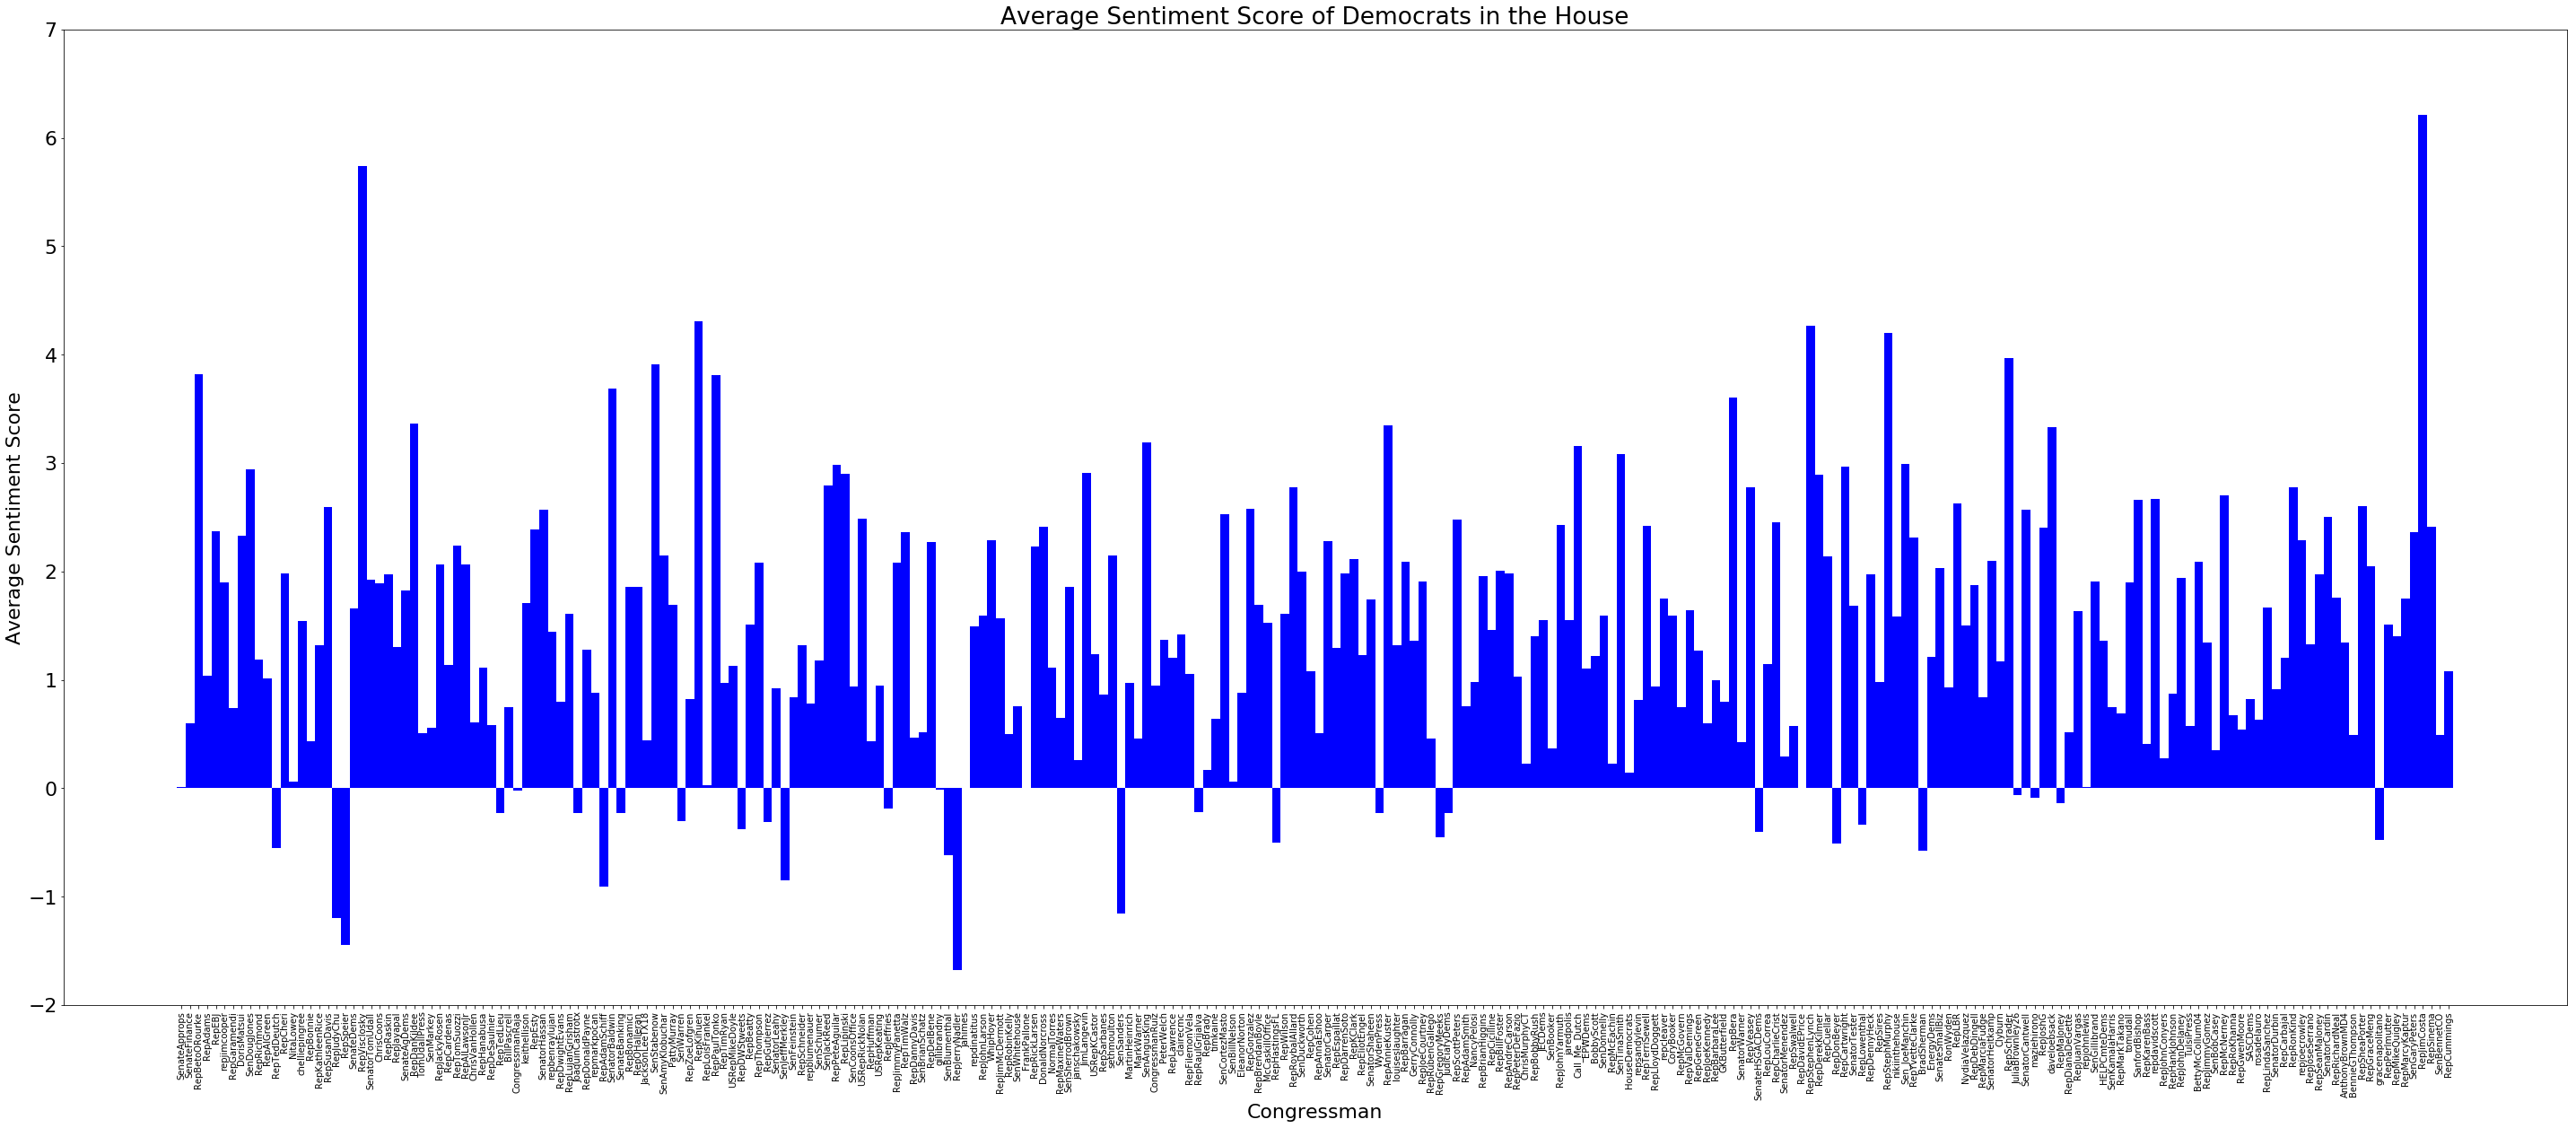

In [11]:
# import plot library
import matplotlib.pyplot as plt
# set size of figure
plt.rcParams['figure.figsize'] = [50, 20]
# set font size
plt.rcParams.update({'font.size': 22})
# make a bar plot of the democrats average sentiment scores 
plt.bar(demsAvgScore.keys(), demsAvgScore.values(), 1.0, color='b')
# rotate the x-axis labels so they can be seen
plt.xticks(rotation=90, fontsize=10)
# set a y-limit so all graphs will have the same y-axis
plt.ylim(-2, 7)
plt.xlabel("Congressman")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment Score of Democrats in the House")
# save the figure to computer
fig = plt.savefig('house_dem_avgsent.png')
plt.show()

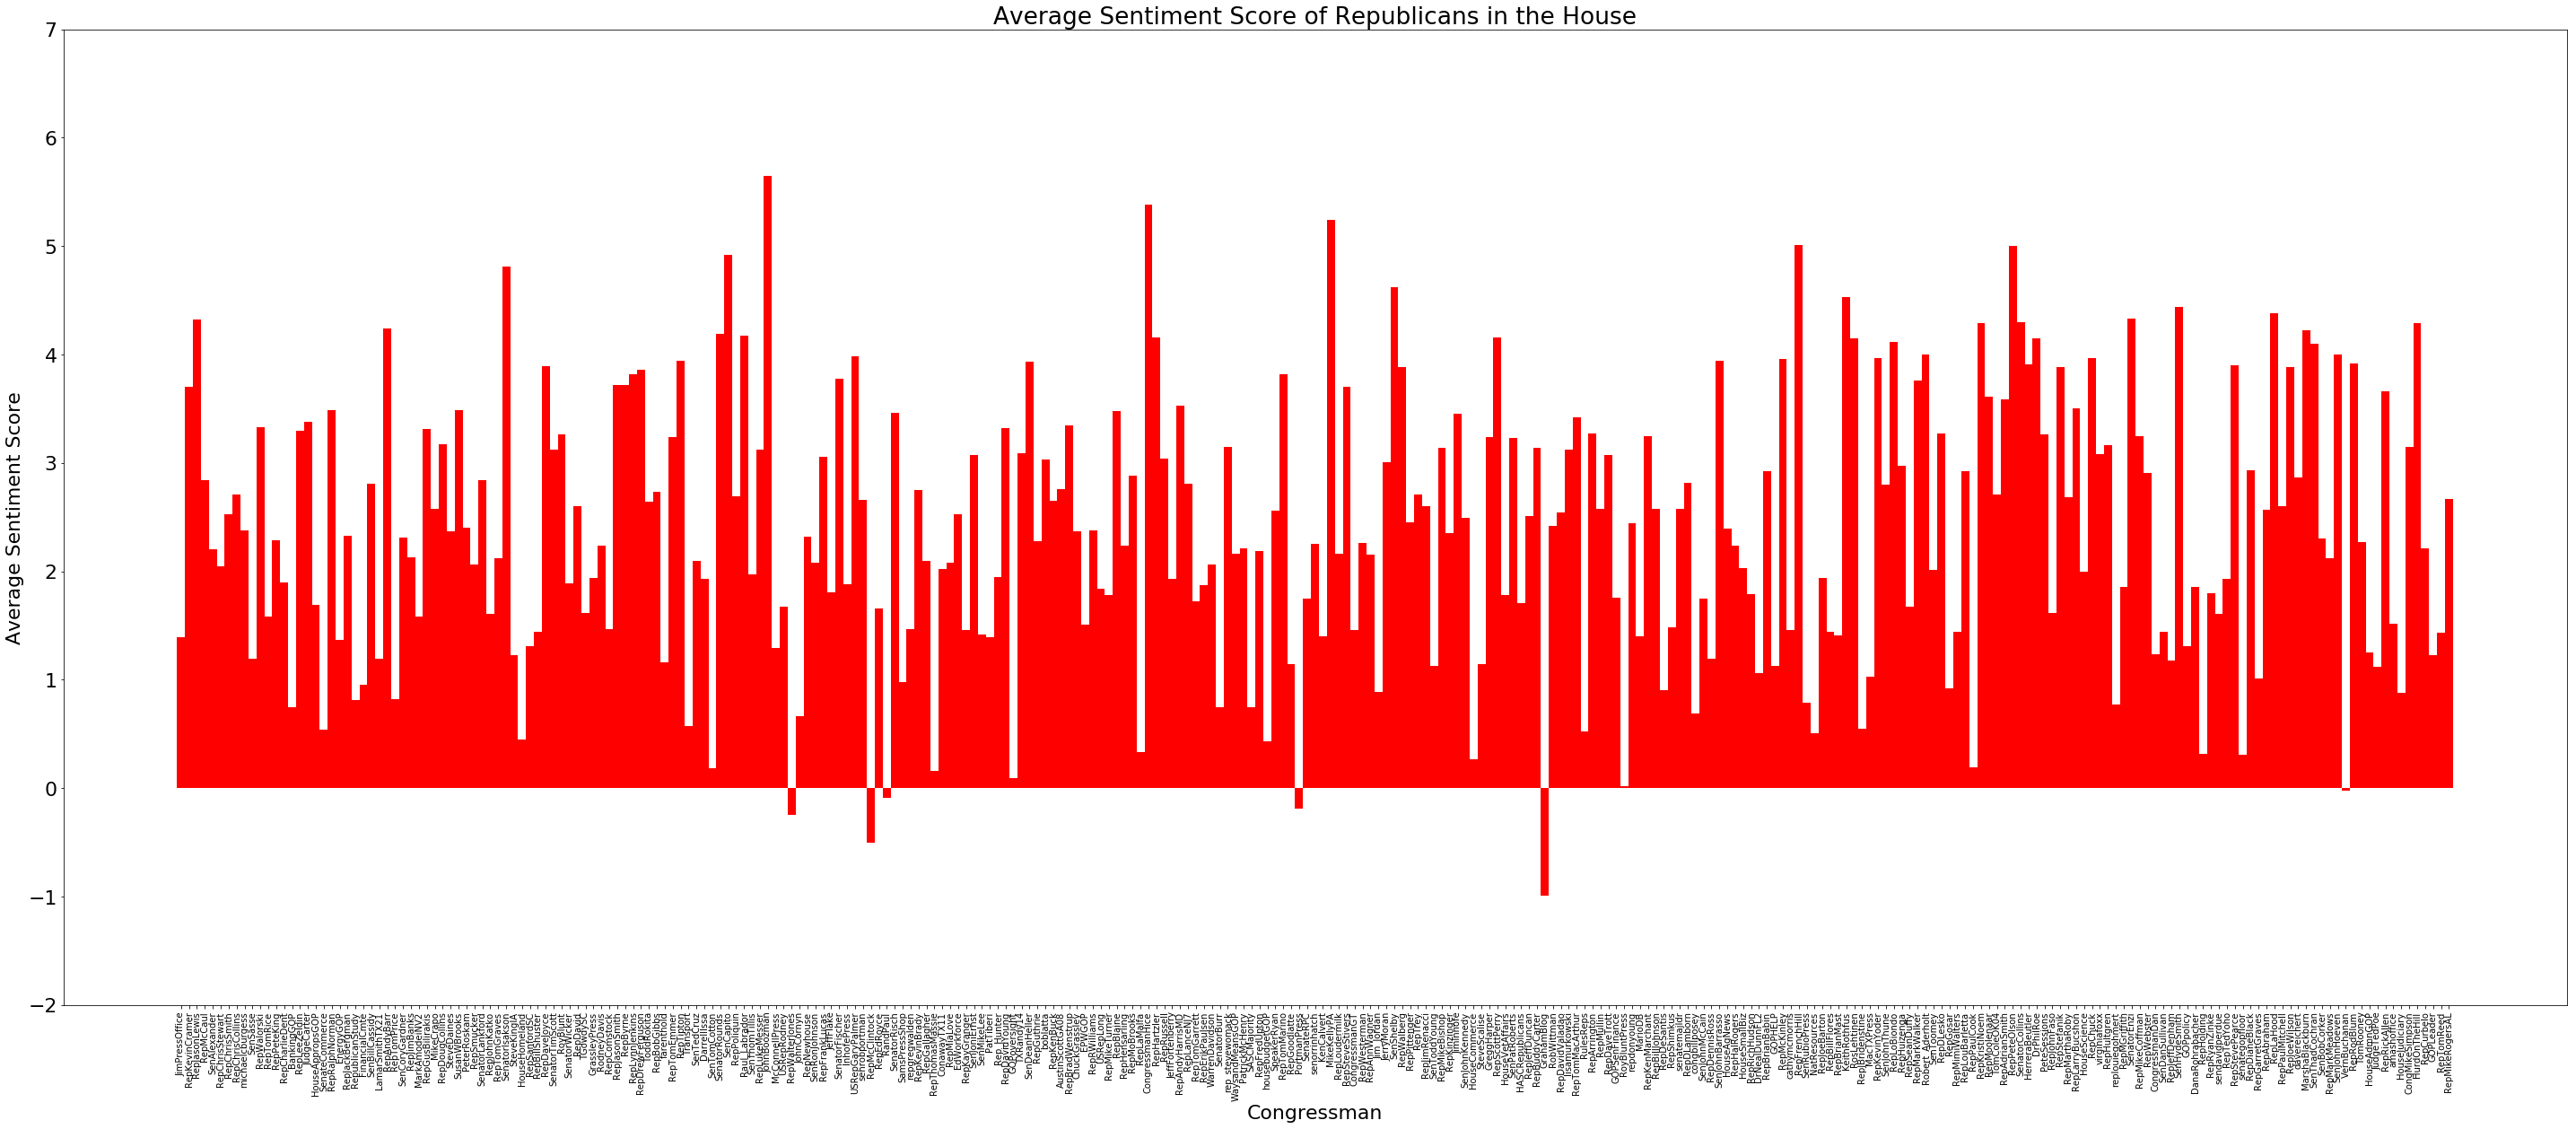

In [12]:
# make a bar plot of the republicans average sentiment scores
plt.bar(repsAvgScore.keys(), repsAvgScore.values(), 1.0, color='r')
plt.xticks(fontsize = 10,rotation=90)
# set the y-axis
plt.ylim(-2, 7)
plt.xlabel("Congressman")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment Score of Republicans in the House")
fig = plt.savefig('house_rep_avgsent.png')
plt.show()

Next, we are interested in exploring what the mentions in the most negative and most positive Twitter users' tweets are.

In [13]:
import operator

# sort all the democrat scores in ascending order
dem_sorted_scores = sorted(demsAvgScore.items(), key=operator.itemgetter(1))
# get 10 most negative
most_neg_dems = dem_sorted_scores[:10]
# get 10 most positive
most_pos_dems = dem_sorted_scores[len(dem_sorted_scores)-10:len(dem_sorted_scores)]

# sort all the republican scores in ascending order
rep_sorted_scores = sorted(repsAvgScore.items(), key=operator.itemgetter(1))
# get 10 most negative
most_neg_reps = rep_sorted_scores[:10]
# get 10 most positive
most_pos_reps = rep_sorted_scores[len(rep_sorted_scores)-10:len(rep_sorted_scores)]

Here we go through all of the top 10 most negative Republican and Democrat's tweets and get all of their mentions in their negative tweets.

In [16]:
import re
# string to hold all the mentions in negative tweets by top 10 most negative democrats for the word cloud
allDemNegMentions = ""
# for congressman
for name in most_neg_dems:
    # for tweet object in json
    for i in xrange(0,len(houseDem)):
        # if it is the congressman's tweet
        if houseDem[i]['author_name'] == name[0]:
             # if the mentions list is not empty and sentiment is negative
                if (houseDem[i]['mentions']) and (houseDem[i]['sentiment'] < 0):
                    # declare empty mentions list
                    mentions = []
                    # split on commas in case there are multiple mentions
                    mentionsList = houseDem[i]['mentions'].split(',')
                    # for every mention
                    for m in mentionsList:
                            # split on screenname
                            result = re.search('ScreenName=(.*)\)', m)
                            # if there is a result
                            if result is not None:
                                # add the mention to the string 
                                allDemNegMentions += result.group(1) + " "
                                
# add in the senators who were in the top 10 most negative
for name in most_neg_dems:
    # for tweet object in json
    for i in xrange(0,len(senateDem)):
        # if it is the congressman's tweet
        if senateDem[i]['author_name'] == name[0]:
            # if the mentions list is not empty and sentiment is negative
            if (senateDem[i]['mentions']) and (senateDem[i]['sentiment'] < 0):
                # declare empty mentions list
                mentions = []
                # split on commas in case there are multiple mentions
                mentionsList = senateDem[i]['mentions'].split(',')
                # for every mention
                for m in mentionsList:
                        # split on screenname
                        result = re.search('ScreenName=(.*)\)', m)
                        # if there is a result
                        if result is not None:
                            # add mention to the string
                            allDemNegMentions += result.group(1) + " " 
                            
# string to hold all the mentions in negative tweets by top 10 most negative republicans
allRepNegMentions = ""
# for congressman
for name in most_neg_reps:
    # for tweet object in json
    for i in xrange(0,len(houseRep)):
        # if it is the congressman's tweet
        if houseRep[i]['author_name'] == name[0]:
            # if the mentions list is not empty and sentiment is negative
            if (houseRep[i]['mentions']) and (houseRep[i]['sentiment'] < 0):
                # declare empty mentions list
                mentions = []
                # split on commas in case there are multiple mentions
                mentionsList = houseRep[i]['mentions'].split(',')
                # for every mention
                for m in mentionsList:
                        # split on screenname
                        result = re.search('ScreenName=(.*)\)', m)
                        # if there is a result
                        if result is not None:
                            # add mention to the string
                            allRepNegMentions += result.group(1) + " "
                                        
# add in the republican senators mentions who were in the top 10 most negative
for name in most_neg_reps:
    # for tweet object in json
    for i in xrange(0,len(senateRep)):
        # if it is the congressman's tweet
        if senateRep[i]['author_name'] == name[0]:
            # if the mentions list is not empty and sentiment is negative
            if (senateRep[i]['mentions']) and (senateRep[i]['sentiment'] < 0):
                # declare empty mentions list
                mentions = []
                # split on commas in case there are multiple mentions
                mentionsList = senateRep[i]['mentions'].split(',')
                # for every mention
                for m in mentionsList:
                        # split on screenname
                        result = re.search('ScreenName=(.*)\)', m)
                        # if there is a result
                        if result is not None:
                            # add mention to the string
                            allRepNegMentions += result.group(1) + " "                             

Now we are going to get the top 10 most positive Republican and Democrat's tweets and get all of their mentions in their positive tweets.

In [17]:
# string to hold all the mentions in positive tweets by top 10 most positive democrats
allDemPosMentions = ""
# for congressman
for name in most_pos_dems:
    # for tweet object in json
    for i in xrange(0,len(houseDem)):
        # if it is the congressman's tweet
        if houseDem[i]['author_name'] == name[0]:
            # if the mentions list is not empty and sentiment is positive
            if (houseDem[i]['mentions']) and (houseDem[i]['sentiment'] > 0):
                # declare empty mentions list
                mentions = []
                # split on commas in case there are multiple mentions
                mentionsList = houseDem[i]['mentions'].split(',')
                # for every mention
                for m in mentionsList:
                        # split on screenname
                        result = re.search('ScreenName=(.*)\)', m)
                        # if there is a result
                        if result is not None:
                            allDemPosMentions += result.group(1) + " "
                                                               
# add in democratic senators who were in the top 10 mentions to the list
for name in most_pos_dems:
    # for tweet object in json
    for i in xrange(0,len(senateDem)):
        # if it is the congressman's tweet
        if senateDem[i]['author_name'] == name[0]:
                # if the mentions list is not empty and sentiment is positive
                if (senateDem[i]['mentions']) and (senateDem[i]['sentiment'] > 0):
                    # declare empty mentions list
                    mentions = []
                    # split on commas in case there are multiple mentions
                    mentionsList = senateDem[i]['mentions'].split(',')
                    # for every mention
                    for m in mentionsList:
                            # split on screenname
                            result = re.search('ScreenName=(.*)\)', m)
                            # if there is a result
                            if result is not None:
                                allDemPosMentions += result.group(1) + " "

# string to hold all the mentions in positive tweets by top 10 most positive republicans
allRepPosMentions = ""
# for congressman
for name in most_pos_reps:
    # for tweet object in json
    for i in xrange(0,len(houseRep)):
        # if it is the congressman's tweet
        if houseRep[i]['author_name'] == name[0]:
            # if the mentions list is not empty and sentiment is positive
            if (houseRep[i]['mentions']) and (houseRep[i]['sentiment'] > 0):
                # declare empty mentions list
                mentions = []
                # split on commas in case there are multiple mentions
                mentionsList = houseRep[i]['mentions'].split(',')
                # for every mention
                for m in mentionsList:
                        # split on screenname
                        result = re.search('ScreenName=(.*)\)', m)
                        # if there is a result
                        if result is not None:
                            allRepPosMentions += result.group(1) + " "

                                
# add in republican senators who were in the top 10 mentions to the list
for name in most_pos_reps:
    # for tweet object in json
    for i in xrange(0,len(senateRep)):
        # if it is the congressman's tweet
        if senateRep[i]['author_name'] == name[0]:
                # if the mentions list is not empty and sentiment is positive
                if (senateRep[i]['mentions']) and (senateRep[i]['sentiment'] > 0):
                    # declare empty mentions list
                    mentions = []
                    # split on commas in case there are multiple mentions
                    mentionsList = senateRep[i]['mentions'].split(',')
                    # for every mention
                    for m in mentionsList:
                            # split on screenname
                            result = re.search('ScreenName=(.*)\)', m)
                            # if there is a result
                            if result is not None:
                                allRepPosMentions += result.group(1) + " "

Next, we will make wordclouds to show the most common mentions in positive and negative tweets, split up by political party.

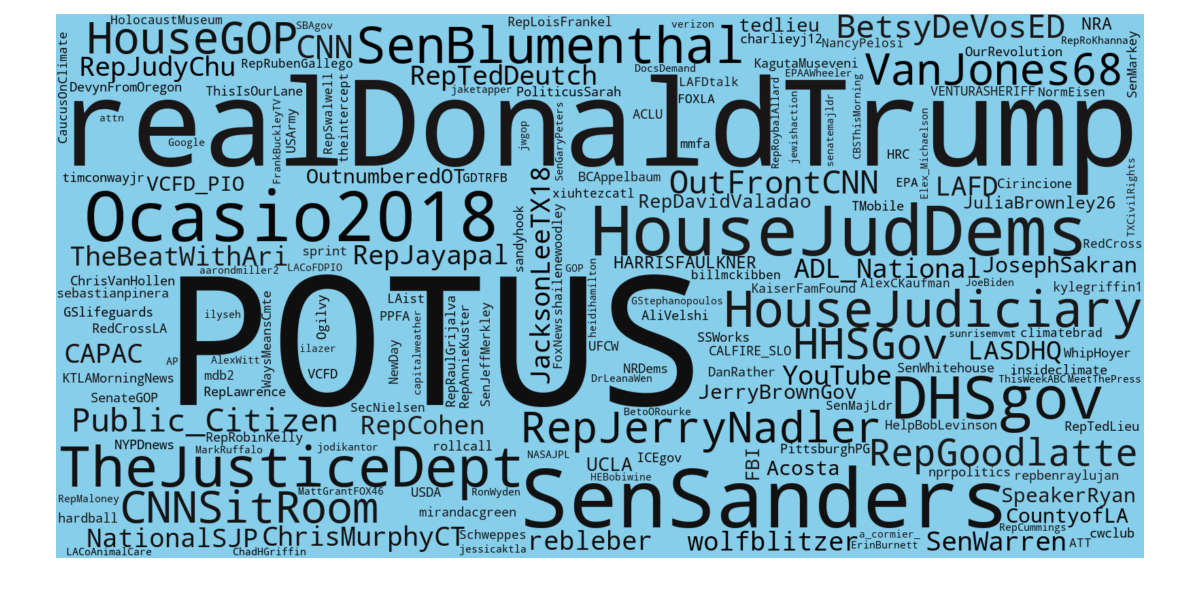

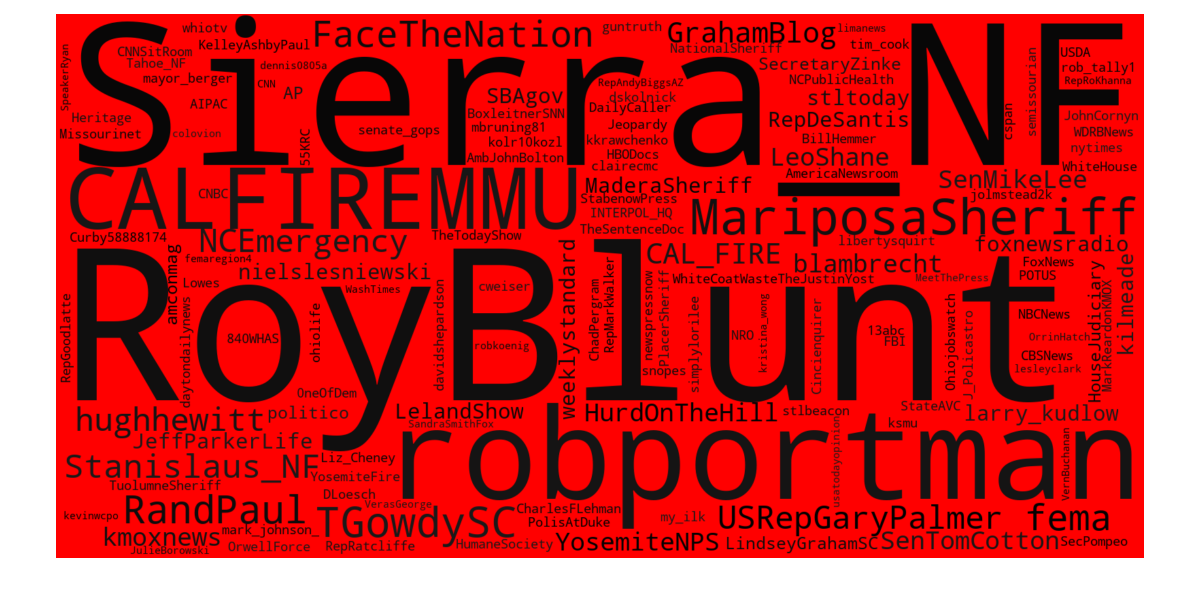

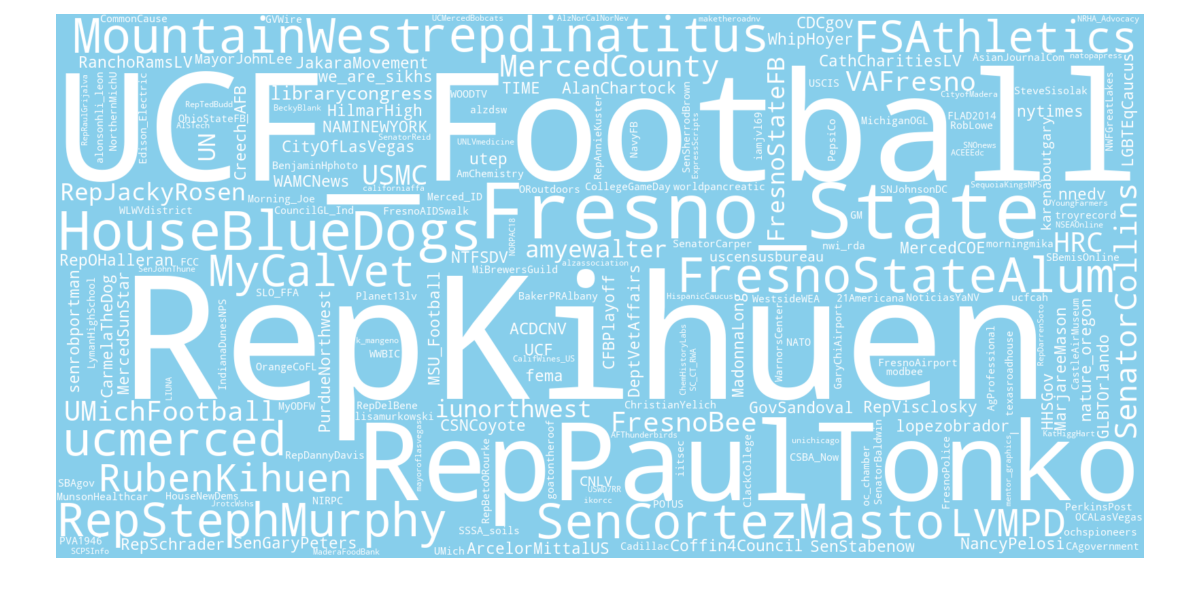

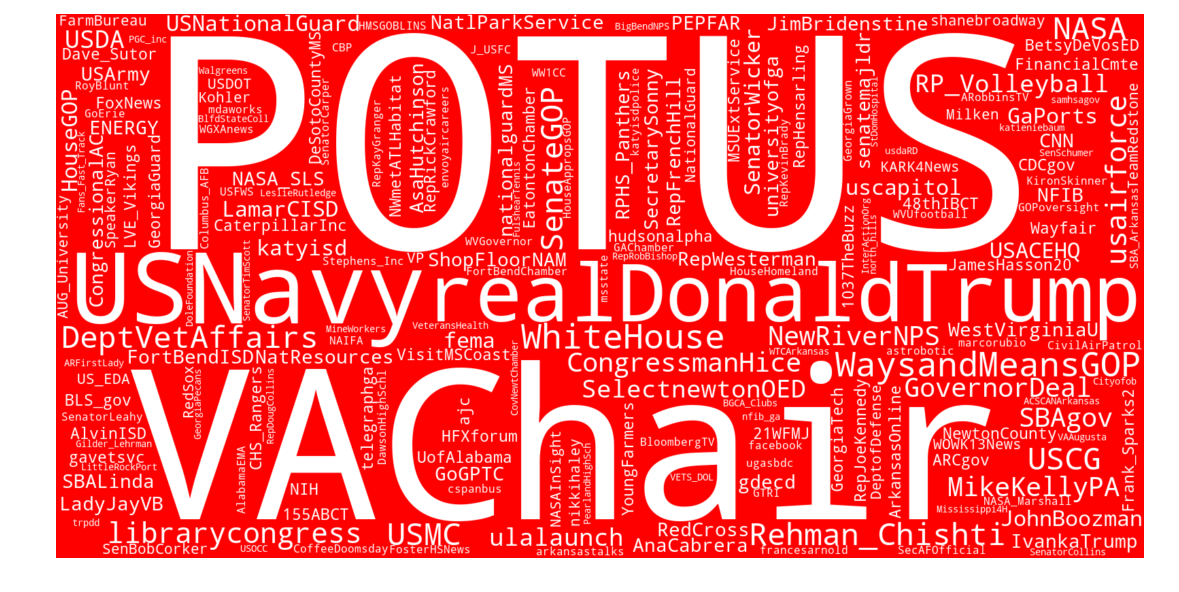

In [20]:
import random
from wordcloud import wordcloud 

# color functions for font color of the word cloud
# black font
def black_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(3, 3%%, %d%%)" % random.randint(0, 10)

# white font
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(3, 3%%, %d%%)" % random.randint(500, 600)

# create word cloud of the democratic mentions with negative sentiment scores
wc = wordcloud.WordCloud(background_color="skyblue",
                        width=1600, height=800,
                          collocations = False,
                         ).generate(allDemNegMentions)
plt.figure( figsize=(20,10) )
plt.imshow(wc.recolor(color_func=black_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
#plt.savefig("dems_neg_wordcloud.png")
plt.show()

# make word cloud of republican mentions with negative sentiment scores
wc = wordcloud.WordCloud(background_color="red",
                        width=1600, height=800,
                          collocations = False, stopwords="royblunt"
                         ).generate(allRepNegMentions)
plt.figure( figsize=(20,10) )
plt.imshow(wc.recolor(color_func=black_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
#plt.savefig("reps_neg_wordcloud.png")
plt.show()

# make a word cloud of democratic mentions with positive sentiment score
wc = wordcloud.WordCloud(background_color="skyblue",
                        width=1600, height=800,
                          collocations = False,
                         ).generate(allDemPosMentions)
plt.figure( figsize=(20,10) )
plt.imshow(wc.recolor(color_func=white_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
#plt.savefig("dems_pos_wordcloud.png")
plt.show()

# word cloud of republican mentions with positive sentiment score
wc = wordcloud.WordCloud(background_color="red",
                        width=1600, height=800,
                          collocations = False,
                         ).generate(allRepPosMentions)
plt.figure( figsize=(20,10) )
plt.imshow(wc.recolor(color_func=white_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
#plt.savefig("reps_pos_wordcloud.png")
plt.show()

For the next part of the analysis, we will make a dictionary where the hashtags are the keys, so that we can get a list of all user's who used the same hashtags.

In [23]:
# initialize the dict
hashtagMap = {}
# for every tweet in houseDEm
for i in xrange(0,len(houseDem)):
    # there are no hashtags, do nothing
    if not houseDem[i]['hashtags']:
        # do nothing
        print ""
    else:
        # split the list on commas 
        hashList = houseDem[i]['hashtags'].split(',')
        # for every hashtag
        for h in hashList:
            # get the part of the string that is just the hash tag
            result = re.search('Text=u\'(.*)\'\)', h)
            # if there is a result
            if result is not None:
                # if the hash tag is not already in the dict
                if not result.group(1) in hashtagMap:
                    # make a list of people
                    people = []
                    # add this user to the list
                    people.append(houseDem[i]['author_name'])
                    # put it in the dict
                    hashtagMap[result.group(1)] = people
                # this hash tag is already in the dict
                else:
                    # get the list already in the dict
                    getPeople = hashtagMap.get(result.group(1))
                    # if the author is not already in the list, add it in and put it back in the dict
                    if houseDem[i]['author_name'] not in getPeople:
                        getPeople.append(houseDem[i]['author_name'])
                        hashtagMap[result.group(1)] = getPeople

# repeat the same process for democratic senators
for i in xrange(0,len(senateDem)):
    if not senateDem[i]['hashtags']:
        print ""
    else:
        # split on commas in case there are multiple mentions
        hashList = senateDem[i]['hashtags'].split(',')
        # for every hashtag
        for h in hashList:
            # split text
            result = re.search('Text=u\'(.*)\'\)', h)
            # if there is a result
            if result is not None:
                # if the hash tag is not already in the dict
                if not result.group(1) in hashtagMap:
                    people = []
                    people.append(senateDem[i]['author_name'])
                    hashtagMap[result.group(1)] = people
                else:
                    getPeople = hashtagMap.get(result.group(1))
                    if senateDem[i]['author_name'] not in getPeople:
                        getPeople.append(senateDem[i]['author_name'])
                        hashtagMap[result.group(1)] = getPeople

# repeat process for republicans in the house
for i in xrange(0,len(houseRep)):
    if not houseRep[i]['hashtags']:
        print ""
    else:
        # split on commas in case there are multiple mentions
        hashList = houseRep[i]['hashtags'].split(',')
        # for every hashtag
        for h in hashList:
            # split text
            result = re.search('Text=u\'(.*)\'\)', h)
            # if there is a result
            if result is not None:
                # if the hash tag is not already in the dict
                if not result.group(1) in hashtagMap:
                    people = []
                    people.append(houseRep[i]['author_name'])
                    hashtagMap[result.group(1)] = people
                else:
                    getPeople = hashtagMap.get(result.group(1))
                    if houseRep[i]['author_name'] not in getPeople:
                        getPeople.append(houseRep[i]['author_name'])
                        hashtagMap[result.group(1)] = getPeople

# repeat the process for republicans in the seante
for i in xrange(0,len(senateRep)):
    if not senateRep[i]['hashtags']:
        print ""
    else:
        # split on commas in case there are multiple mentions
        hashList = senateRep[i]['hashtags'].split(',')
        # for every hashtag
        for h in hashList:
            # split text
            result = re.search('Text=u\'(.*)\'\)', h)
            # if there is a result
            if result is not None:
                # if the hash tag is not already in the dict
                if not result.group(1) in hashtagMap:
                    people = []
                    people.append(senateRep[i]['author_name'])
                    hashtagMap[result.group(1)] = people
                else:
                    getPeople = hashtagMap.get(result.group(1))
                    if senateRep[i]['author_name'] not in getPeople:
                        getPeople.append(senateRep[i]['author_name'])
                        hashtagMap[result.group(1)] = getPeople

Now, we will use the dictionary we just made to make a dict of user's to everyone who used the same hash tag as them.

In [24]:
# initialize the dict
connectionsMap = {}
# for every hash tag
for hashtag in hashtagMap:
    # get the list of people who used that hash tag
    peopleList = hashtagMap.get(hashtag)
    # create every tuple to get all connetions
    allTuples = [(peopleList[i],peopleList[j]) for i in range(len(peopleList)) for j in range(i+1, len(peopleList))]
    # for every tuple
    for tuple in allTuples:
        # if the first person is not in the dict yet
        if not tuple[0] in connectionsMap: 
            # add the second person to the connection list
            connList = []
            connList.append(tuple[1])
            # put the connection in the dict
            connectionsMap[tuple[0]] = connList
        # first person is already in the dict
        else:
            # get the list of connections
            getList = connectionsMap.get(tuple[0])
            # if second person is not already listed as a connection
            if tuple[1] not in getList:
                # add to the list
                getList.append(tuple[1])
                # add it back into the dict
                connectionsMap[tuple[0]] = getList

Now we will create scatterplots demonstrating the relationship between sentiment scores, favorites, and retweets. 

In [25]:
import json

alltweets = []
filenames = ['house_dem_tweets.json', 'house_rep_tweets.json', 'senate_dem_tweets.json', 'senate_rep_tweets.json']
affinRep = []
affinDem = []
affinTrump = []
retweetsRep = []
retweetsDem = []
retweetsTrump = []
favsRep = []
favsDem = []
favsTrump = []

# this method parses the tweets and gets the sentiment scores for 
def tweetParser(filename, p):
    with open(filename) as f:
        text = json.load(f)
        for i in xrange(0,len(text)):
            if(p == "dem"):
                #append the sentiment score for the affin
                affinDem.append(text[i]['sentiment'])
                #append the sentiment score for the retweet
                retweetsDem.append(text[i]['retweets'])  
                #append the sentiment score for the favorites
                favsDem.append(text[i]['favorites'])
            if(p == "rep"):
                #append the sentiment score for the affin
                affinRep.append(text[i]['sentiment'])
                #append the sentiment score for the retweet
                retweetsRep.append(text[i]['retweets'])
                #append the sentiment score for the favorites
                favsRep.append(text[i]['favorites'])
            if (p == "trump"):
                #append the sentiment score for the affin
                affinTrump.append(text[i]['sentiment'])
                #append the sentiment score for the retweet
                retweetsTrump.append(text[i]['retweets'])
                #append the sentiment score for the favorites
                favsTrump.append(text[i]['favorites'])

In [26]:
#parsing the house democrats      
tweetParser('house_dem_tweets.json', "dem");

#parsing the house republicans
tweetParser('house_rep_tweets.json', "rep");

#parsing the senate democrats
tweetParser('senate_dem_tweets.json', "dem");

#parsing the senate republicans
tweetParser('senate_rep_tweets.json', "rep");

#parsing the trump tweets
tweetParser('trump_tweets.json', "trump");

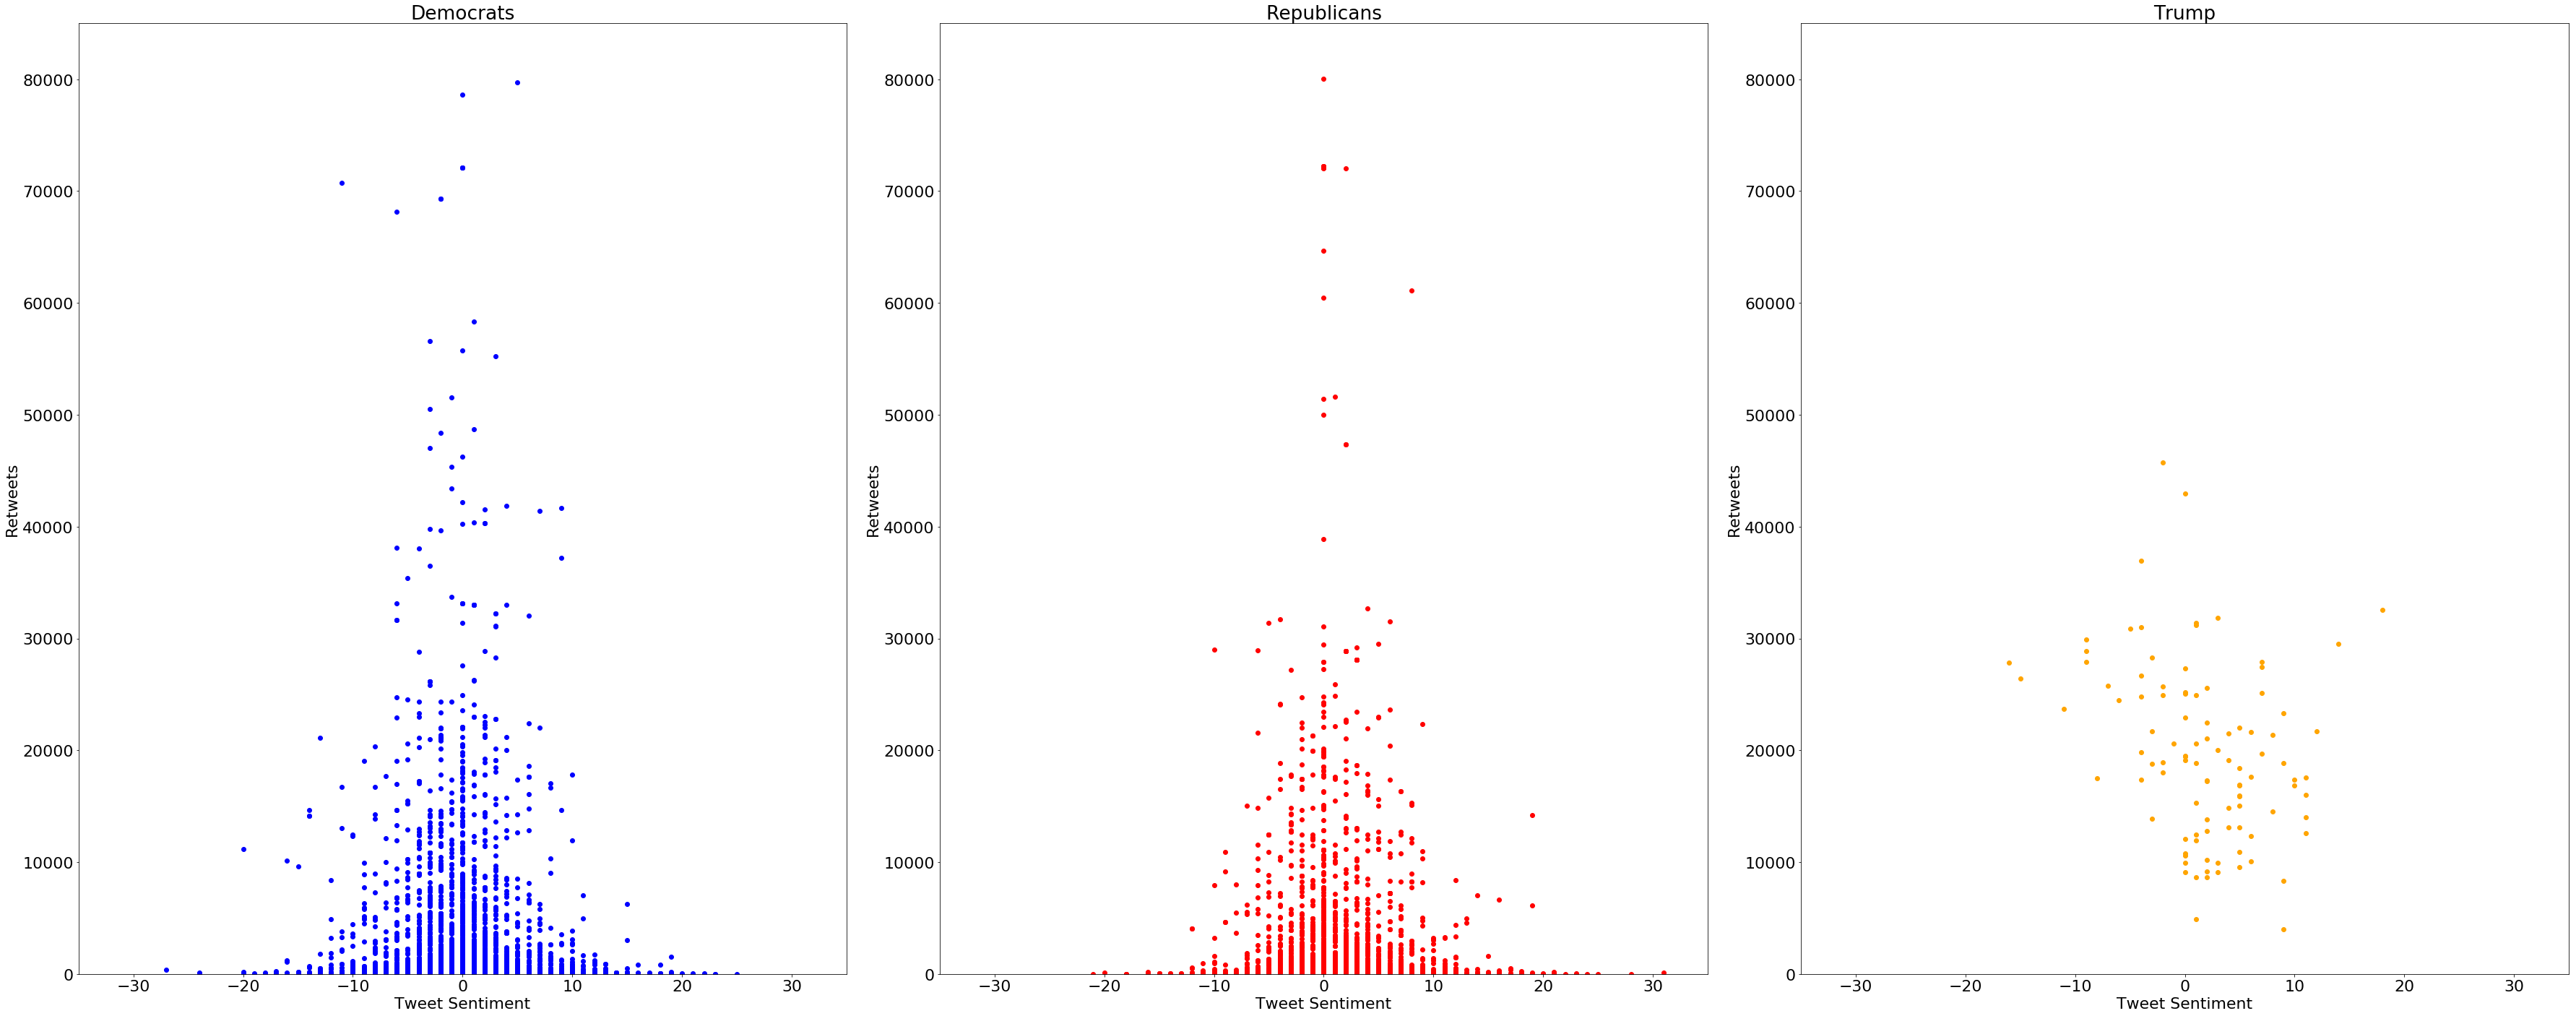

In [27]:
from matplotlib import pyplot as plt
plt.subplot(1, 3, 1)
plt.scatter(affinDem, retweetsDem, color = 'blue')
plt.title("Democrats")
plt.xlabel("Tweet Sentiment")
plt.ylabel("Retweets")
plt.xlim([-35,35])
plt.ylim([0, 85000])

plt.subplot(1, 3, 2)
plt.scatter(affinRep, retweetsRep, color = 'red')
plt.title("Republicans")
plt.xlabel("Tweet Sentiment")
plt.ylabel("Retweets")
plt.xlim([-35,35])
plt.ylim([0, 85000])

plt.subplot(1, 3, 3)
plt.scatter(affinTrump, retweetsTrump, color = 'orange')
plt.title("Trump")
plt.xlabel("Tweet Sentiment")
plt.ylabel("Retweets")
plt.xlim([-35,35])
plt.ylim([0, 85000])

plt.tight_layout();
plt.savefig("retweets_sentiments.png")
plt.show();

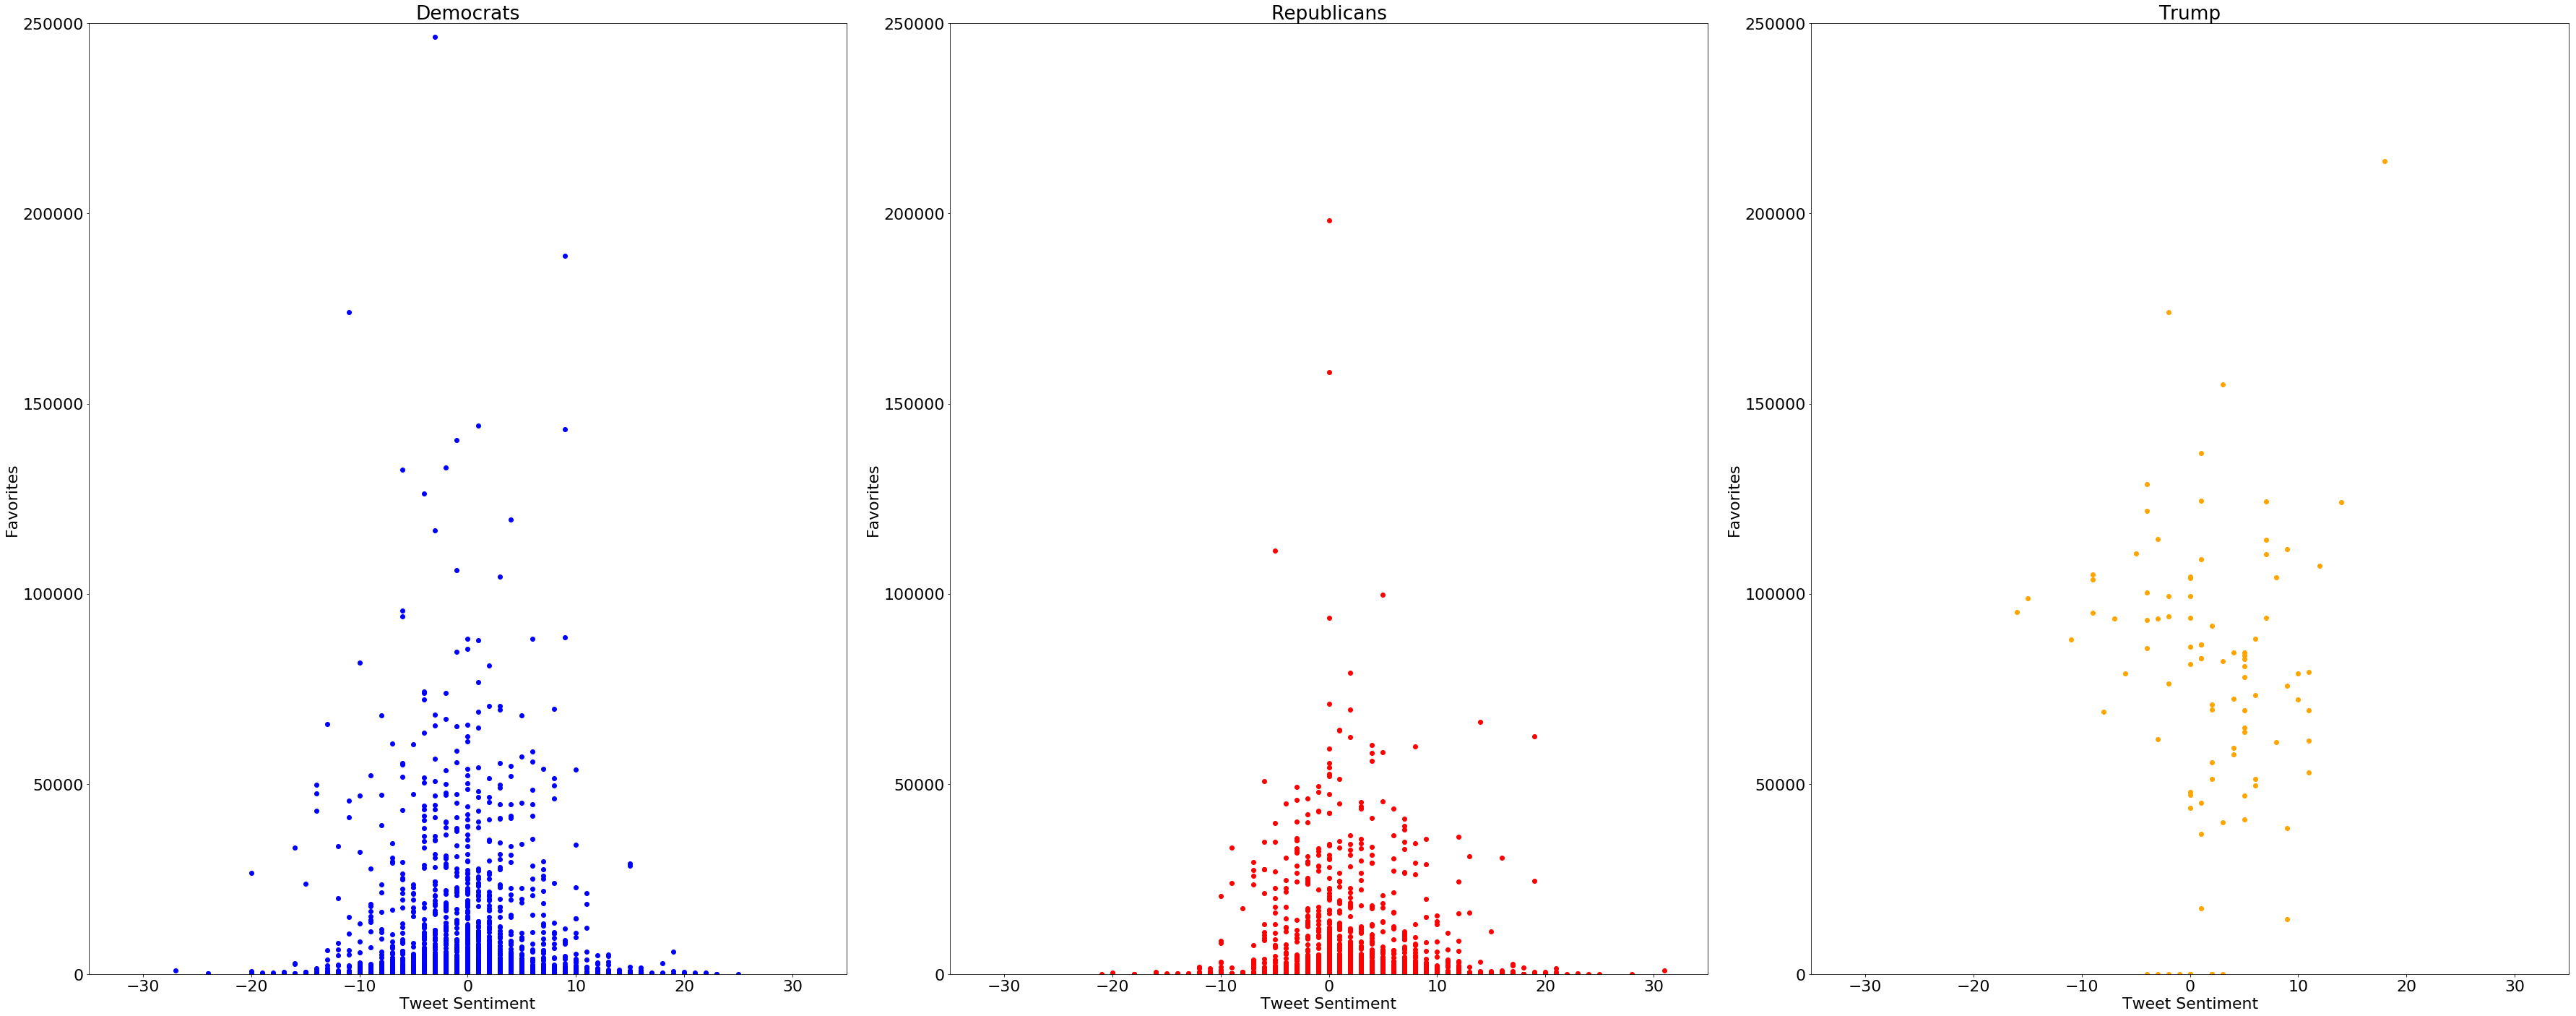

In [28]:
plt.subplot(1, 3, 1)
plt.scatter(affinDem, favsDem, color = 'blue')
plt.title("Democrats")
plt.xlabel("Tweet Sentiment")
plt.ylabel("Favorites")
plt.xlim([-35,35])
plt.ylim([0, 250000])

plt.subplot(1, 3, 2)
plt.scatter(affinRep, favsRep, color = 'red')
plt.title("Republicans")
plt.xlabel("Tweet Sentiment")
plt.ylabel("Favorites")
plt.xlim([-35,35])
plt.ylim([0, 250000])

plt.subplot(1, 3, 3)
plt.scatter(affinTrump, favsTrump, color = 'orange')
plt.title("Trump")
plt.xlabel("Tweet Sentiment")
plt.ylabel("Favorites")
plt.xlim([-35,35])
plt.ylim([0, 250000])

plt.tight_layout();
plt.savefig("favorites_sentiments.png")

Now we will make a network showing the connections between people who used the same hash tags. 

In [29]:
# make a list of all the democrats and republicans in connectionMap so we can color their nodes in the network
htDemocrats = []
htRepublicans = []
for key in hashtagMap:
    if key in senateR_screen_names or key in houseR_screen_names:
        htRepublicans.append(key)
    if key in senateD_screen_names or key in houseD_screen_names:
        htDemocrats.append(key)

In [30]:
# import network package
import networkx as nx
G = nx.Graph()
# add an edge from every user to another user their connected with
for key in hashtagMap:
    for user in hashtagMap[key]:
        if user:
            G.add_edges_from([(key, user)])
            

In [ ]:
# plot the network
pos = nx.spring_layout(G)
plt.figure(3,figsize=(50,30))
# color the nodes based on republican or democrat
nx.draw(G,pos=pos, nodelist = htRepublicans, node_color='r')
nx.draw(G,pos=pos, nodelist = htDemocrats, node_color='b')
#plt.savefig("hashtag_network.png")
plt.show()

Now, we will create the same kind of network, but with mentions instead of hashtags.

In [ ]:
mentionsMap = {}
# for democrats in the house
for i in xrange(0,len(houseDem)):
    # if there are no mentions, do nothing
    if not houseDem[i]['mentions']:
        print ""
    else:
        mentionList = houseDem[i]['mentions'].split(',')
        # for every hashtag
        for m in mentionList:
            # split text to find the mention
            result = re.search('ScreenName=(.*)\)', m)
            # if there is a result
            if result is not None:
                # if the mention is not already in the dict
                if not result.group(1) in mentionsMap:
                    # add the user to the map
                    people = []
                    people.append(houseDem[i]['author_name'])
                    mentionsMap[result.group(1)] = people
                # if the mention is already in the dict, get their list of users, add to it, and put it back in the dict
                else:
                    getPeople = mentionsMap.get(result.group(1))
                    if houseDem[i]['author_name'] not in getPeople:
                        getPeople.append(houseDem[i]['author_name'])
                        mentionsMap[result.group(1)] = getPeople

# for democrats in the senator
for i in xrange(0,len(senateDem)):
    # if there are no mentions, do nothing
    if not senateDem[i]['mentions']:
        print ""
    else:
        mentionList = senateDem[i]['mentions'].split(',')
        # for every hashtag
        for m in mentionList:
            # split text to find the mention
            result = re.search('ScreenName=(.*)\)', m)
            # if there is a result
            if result is not None:
                # if the hash tag is not already in the dict
                if not result.group(1) in mentionsMap:
                    people = []
                    people.append(senateDem[i]['author_name'])
                    mentionsMap[result.group(1)] = people
                else:
                    getPeople = mentionsMap.get(result.group(1))
                    if senateDem[i]['author_name'] not in getPeople:
                        getPeople.append(senateDem[i]['author_name'])
                        mentionsMap[result.group(1)] = getPeople
# for republicans in the house
for i in xrange(0,len(houseRep)):
    if not houseRep[i]['mentions']:
        print ""
    else:
        # split on commas in case there are multiple mentions
        mentionList = houseRep[i]['mentions'].split(',')
        # for every hashtag
        for m in mentionList:
            # split text to find just the mention
            result = re.search('ScreenName=(.*)\)', m)
            # if there is a result
            if result is not None:
                # if the mention is not already in the dict
                if not result.group(1) in mentionsMap:
                    people = []
                    people.append(houseRep[i]['author_name'])
                    mentionsMap[result.group(1)] = people
                else:
                    getPeople = mentionsMap.get(result.group(1))
                    if houseRep[i]['author_name'] not in getPeople:
                        getPeople.append(houseRep[i]['author_name'])
                        mentionsMap[result.group(1)] = getPeople
# for republicans in the sente                        
for i in xrange(0,len(senateRep)):
    if not senateRep[i]['mentions']:
        print ""
    else:
        # split on commas in case there are multiple mentions
        mentionList = senateRep[i]['mentions'].split(',')
        # for every hashtag
        for m in mentionList:
            # split text to find just the mention
            result = re.search('ScreenName=(.*)\)', m)
            # if there is a result
            if result is not None:
                # if the mention is not already in the dict
                if not result.group(1) in mentionsMap:
                    people = []
                    people.append(senateRep[i]['author_name'])
                    mentionsMap[result.group(1)] = people
                else:
                    getPeople = mentionsMap.get(result.group(1))
                    if senateRep[i]['author_name'] not in getPeople:
                        getPeople.append(senateRep[i]['author_name'])
                        mentionsMap[result.group(1)] = getPeople

Now, we will use the dictionary we just made to make a dict of user's to everyone who mentioned the same user as them.

In [ ]:
mentionConMap = {}
for mention in mentionsMap:
    # get all of the people who used the same mention
    peopleList = mentionsMap.get(mention)
    # get all tuples
    allTuples = [(peopleList[i],peopleList[j]) for i in range(len(peopleList)) for j in range(i+1, len(peopleList))]
    # add all tuples to the dictionary so we have all connections
    for tuple in allTuples:
        if not tuple[0] in mentionConMap: 
            connList = []
            connList.append(tuple[1])
            mentionConMap[tuple[0]] = connList
        else:
            getList = mentionConMap.get(tuple[0])
            if tuple[1] not in getList:
                getList.append(tuple[1])
                mentionConMap[tuple[0]] = getList

Now, we will make a network showing the connections between people who used mentioned the same Twitter users in their tweets.

In [ ]:
# make a list of all the democrats and republicans in mentionConMap so we can color their nodes in the network
mDemocrats = []
mRepublicans = []
for key in mentionConMap:
    if key in senateR_screen_names or key in houseR_screen_names:
        mRepublicans.append(key)
    if key in senateD_screen_names or key in houseD_screen_names:
        mDemocrats.append(key)

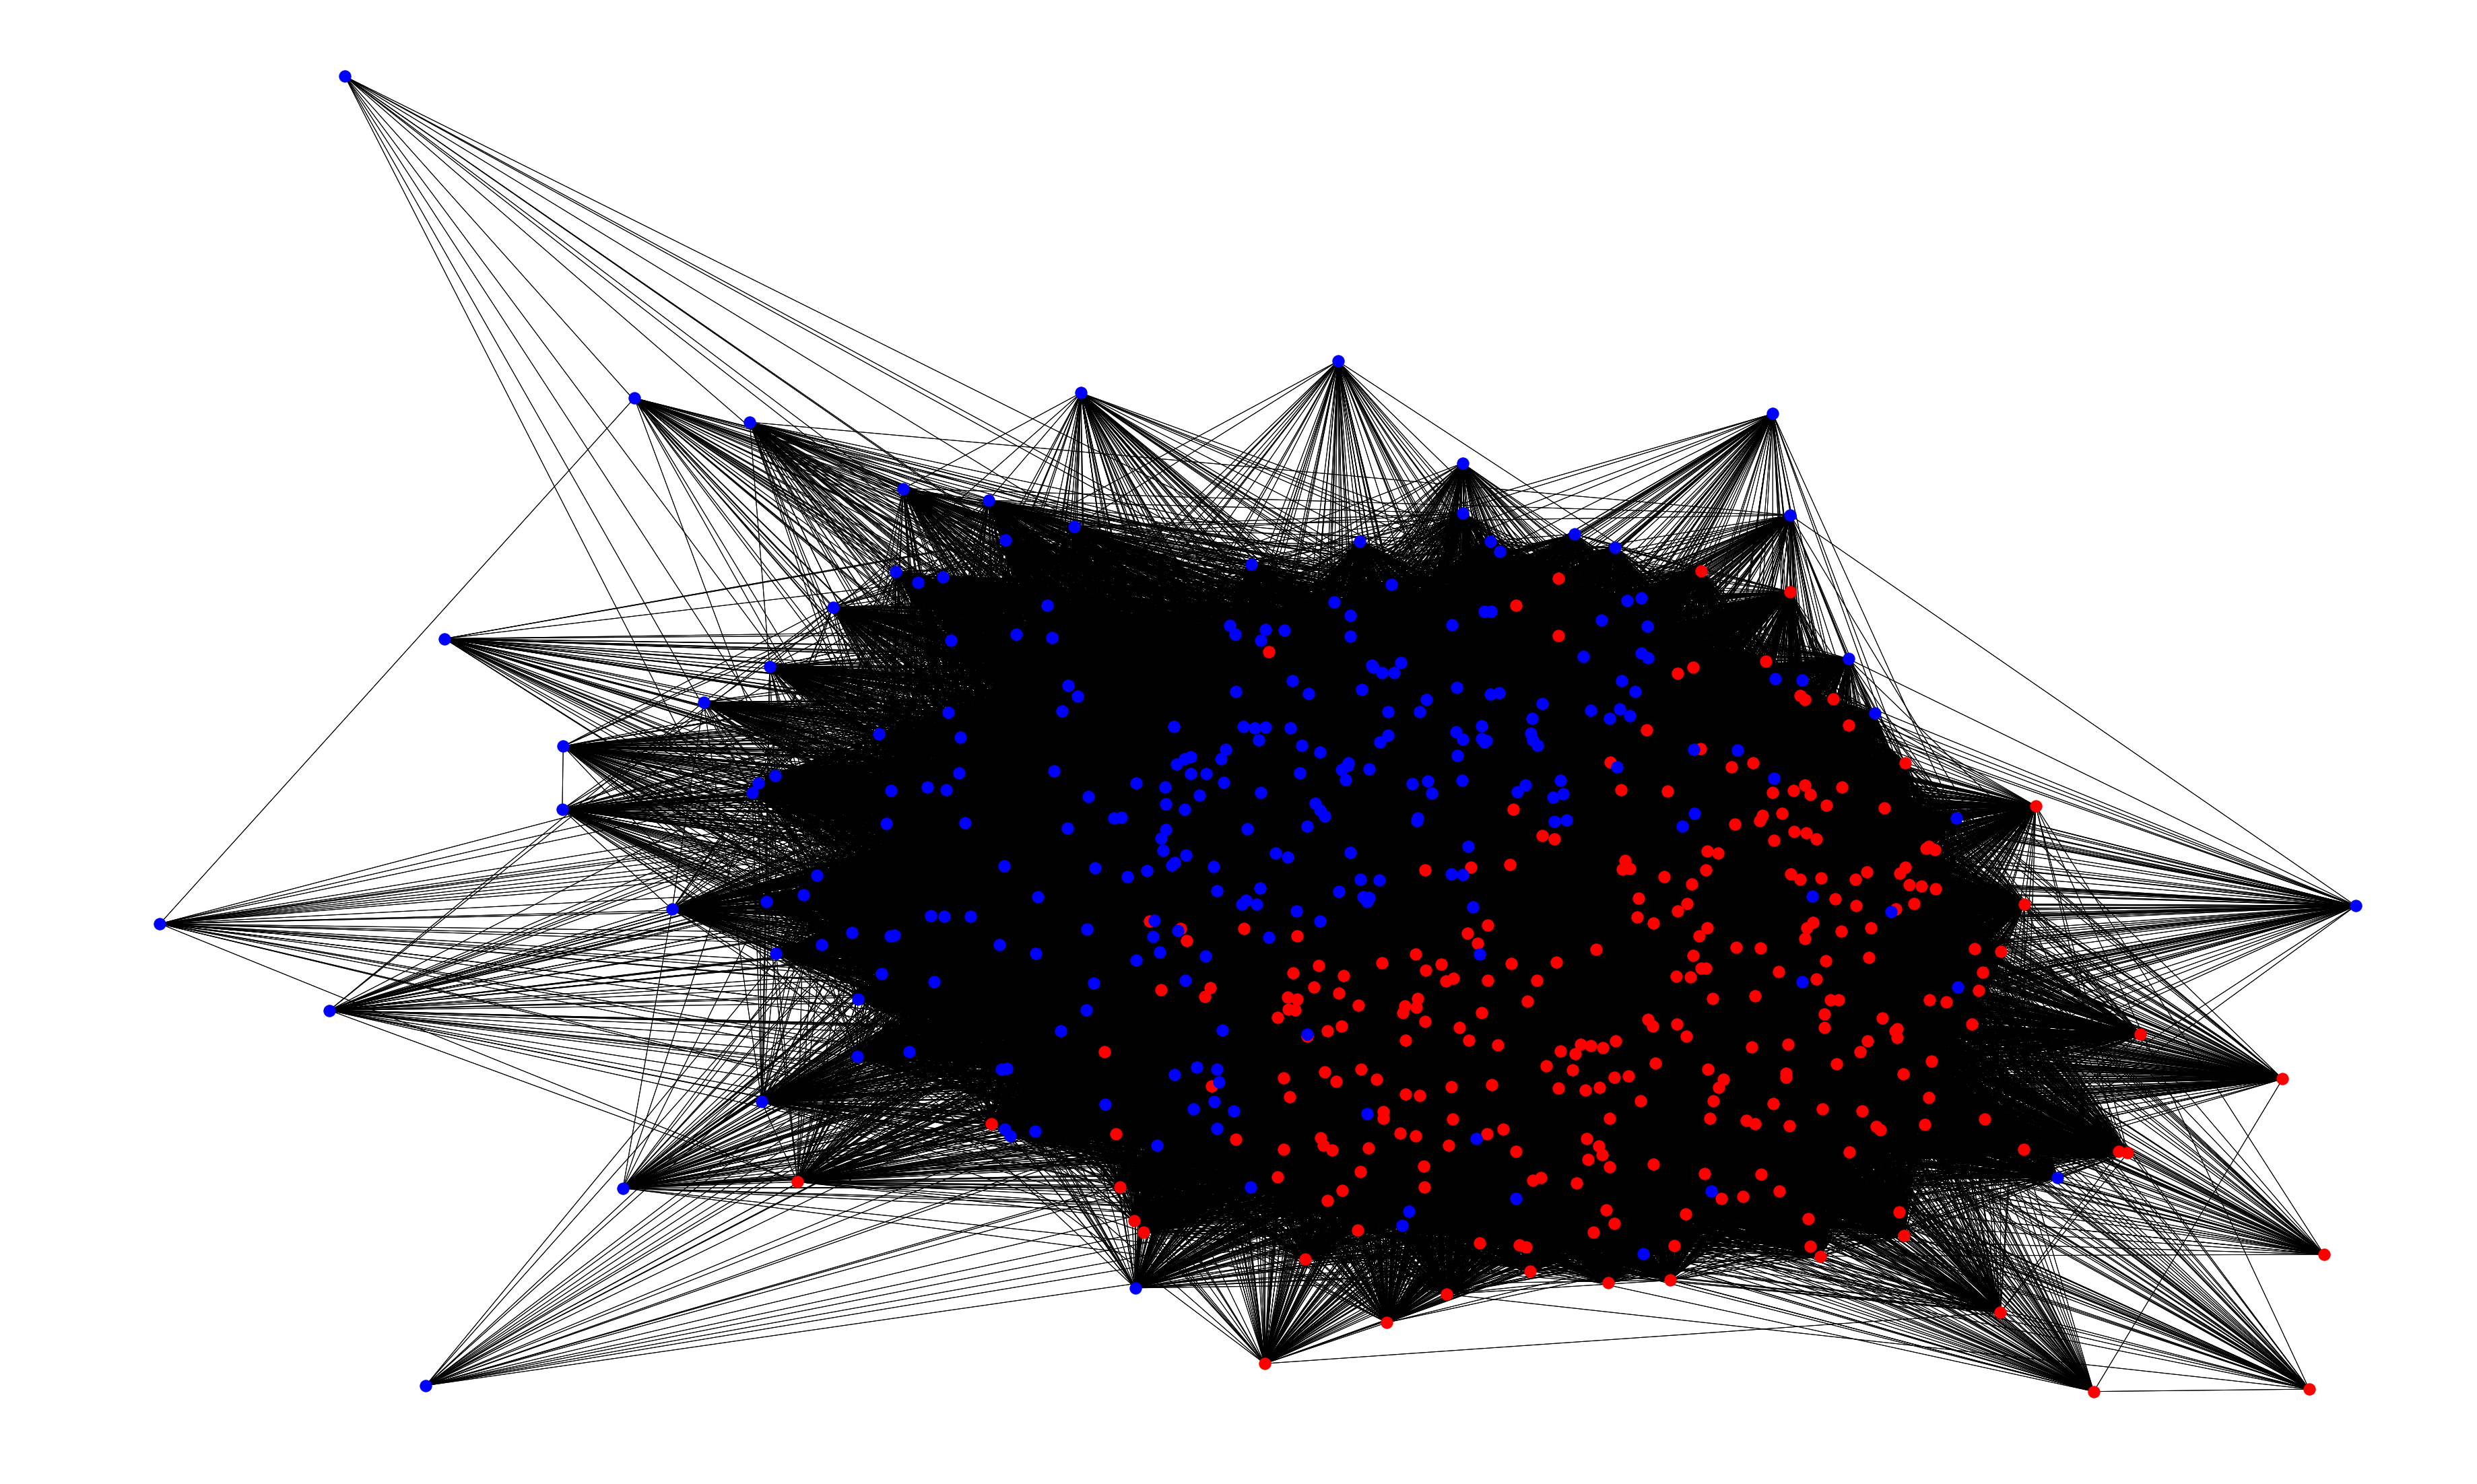

In [294]:
import networkx as nx
G = nx.Graph()
# draw an edge between every user and their connection
for key in mentionConMap:
    for mention in mentionConMap[key]:
        if mention:
            G.add_edges_from([(key, mention)])
            
# plot the network
pos = nx.spring_layout(G)
plt.figure(3,figsize=(50,30))
# color the nodes so republicans are red and democrats are blue
nx.draw(G,pos=pos, nodelist = mRepublicans, node_color='r')
nx.draw(G,pos=pos, nodelist = mDemocrats, node_color='b')
#plt.savefig("hashtag_network.png")
plt.show()